<a href="https://colab.research.google.com/github/reaganwei0216/data/blob/master/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [16]:
import tensorflow as tf
tf.__version__

'1.15.0'

In [17]:
import keras
keras.__version__

'2.2.5'

In [0]:
# ! pip install xgboost

In [0]:
import pandas as pd
import numpy as np  

# from xgboost import XGBClassifier

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.ensemble import AdaBoostClassifier

import nltk
from nltk.corpus import stopwords

In [0]:
def read_data(text_dir):
    f = open(text_dir,'r',encoding = 'utf8')
    lines=f.readlines()
    x_ = []
    y_ = []
    for line in lines :
        try:
            y_.append(int(line.split('+++$+++')[0]))
            x_.append(line.split('+++$+++')[1])
        except:
            if len(line) == 1:
                continue
            y_.append(int(line.split('#####')[0]))
            x_.append(line.split('#####')[1])
    return x_, y_

In [0]:
def print_performance(y, y_hat):
    Accuracy=accuracy_score(y, y_hat)
    Precision=precision_score(y, y_hat, average='macro')    
    Recall=recall_score(y, y_hat,average='macro')
    Fmeasure=f1_score(y, y_hat, average='weighted')  
    print("Accuracy","->",Accuracy)
    print("Precision","->",Precision)
    print("Recall","->",Recall)
    print("Fmeasure","->",Fmeasure)
    print(classification_report(y, y_hat))

In [0]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [60]:
sample_num = 1000
x_train, y_train = read_data("/content/drive/My Drive/DM_HW/HW4_0763418/training_label.txt")
x_test, y_test = read_data("/content/drive/My Drive/DM_HW/HW4_0763418/testing_label.txt")
x_train, y_train = x_train[:sample_num], y_train[:sample_num]

print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

1000
1000
90
90


In [61]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [62]:
vectorizer = CountVectorizer(stop_words=stopwords.words('english'))

ALL = vectorizer.fit_transform(x_train + x_test).toarray()
X_train, X_test = ALL[:len(x_train)], ALL[len(x_train):]
Y_train, Y_test = np.asarray(y_train), np.asarray(y_test)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1000, 3136)
(1000,)
(90, 3136)
(90,)


In [0]:
# ##### xgboost  #####
# xgbc=XGBClassifier()
# model=xgbc.fit(X_train, Y_train)
# Y_pred = model.predict(X_test)
# print_performance(Y_test, Y_pred)

In [0]:
# ##### AdaBoost  #####
# clf = AdaBoostClassifier(n_estimators=1000, random_state=0)
# model=clf.fit(X_train, Y_train)
# Y_pred = model.predict(X_test)
# print_performance(Y_test, Y_pred)

In [0]:
##### RNN  #####
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import SimpleRNN

In [0]:
modelRNN = Sequential()

In [0]:
modelRNN.add(Embedding(output_dim=32,  
     input_dim=3136, 
     input_length=3136))

In [0]:
modelRNN.add(Dropout(0.2)) 

In [0]:
modelRNN.add(SimpleRNN(units=16))

In [0]:
modelRNN.add(Dense(units=256,activation='relu'))

In [71]:
modelRNN.add(Dropout(0.7))

In [0]:
modelRNN.add(Dense(units=1,activation='sigmoid'))

In [73]:
modelRNN.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 3136, 32)          100352    
_________________________________________________________________
dropout_7 (Dropout)          (None, 3136, 32)          0         
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 16)                784       
_________________________________________________________________
dense_7 (Dense)              (None, 256)               4352      
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 105,745
Trainable params: 105,745
Non-trainable params: 0
________________________________________________

In [0]:
modelRNN.compile(loss='binary_crossentropy',
     optimizer='adam',
     metrics=['accuracy']) 

In [75]:
train_history = modelRNN.fit(X_train,Y_train, 
         epochs=10, 
         batch_size=100,
         verbose=2,
         validation_split=0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/10
 - 16s - loss: 0.6955 - acc: 0.4837 - val_loss: 0.6917 - val_acc: 0.5700
Epoch 2/10
 - 16s - loss: 0.6953 - acc: 0.4875 - val_loss: 0.6957 - val_acc: 0.4250
Epoch 3/10
 - 16s - loss: 0.6942 - acc: 0.4900 - val_loss: 0.6937 - val_acc: 0.4400
Epoch 4/10
 - 16s - loss: 0.6919 - acc: 0.5137 - val_loss: 0.6950 - val_acc: 0.4250
Epoch 5/10
 - 16s - loss: 0.6931 - acc: 0.5050 - val_loss: 0.6903 - val_acc: 0.5750
Epoch 6/10
 - 16s - loss: 0.6949 - acc: 0.5225 - val_loss: 0.6899 - val_acc: 0.5750
Epoch 7/10
 - 16s - loss: 0.6954 - acc: 0.4925 - val_loss: 0.6908 - val_acc: 0.5750
Epoch 8/10
 - 16s - loss: 0.6930 - acc: 0.5275 - val_loss: 0.6915 - val_acc: 0.5750
Epoch 9/10
 - 16s - loss: 0.6957 - acc: 0.4925 - val_loss: 0.6912 - val_acc: 0.5750
Epoch 10/10
 - 16s - loss: 0.6946 - acc: 0.4962 - val_loss: 0.6912 - val_acc: 0.5750


In [76]:
scores = modelRNN.evaluate(X_test, Y_test,verbose=1)
print(scores)
print(scores[1])

90/90 [==============================] - 3s 37ms/step
[0.6956391414006551, 0.41111111177338494]
0.41111111177338494


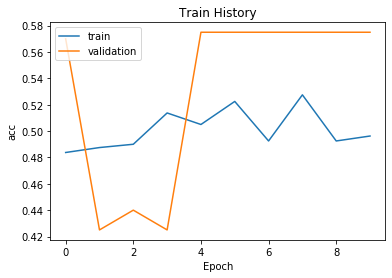

In [77]:
show_train_history(train_history,'acc','val_acc')

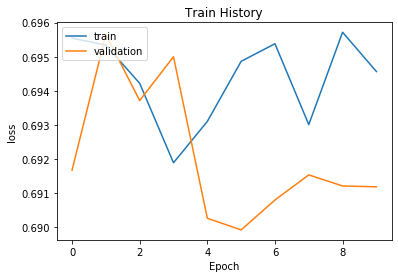

In [78]:
show_train_history(train_history,'loss','val_loss')

In [0]:
##### LSTM  #####

In [0]:
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM

In [0]:
modelLSTM = Sequential() 

In [0]:
modelLSTM.add(Embedding(output_dim=32,  
     input_dim=3136, 
     input_length=3136))

In [0]:
modelLSTM.add(Dropout(0.2)) 

In [0]:
modelLSTM.add(LSTM(32)) 

In [0]:
modelLSTM.add(Dense(units=256,activation='relu')) 

In [86]:
modelLSTM.add(Dropout(0.7))

In [0]:
modelLSTM.add(Dense(units=1,activation='sigmoid'))

In [88]:
modelLSTM.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 3136, 32)          100352    
_________________________________________________________________
dropout_9 (Dropout)          (None, 3136, 32)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_9 (Dense)              (None, 256)               8448      
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 257       
Total params: 117,377
Trainable params: 117,377
Non-trainable params: 0
________________________________________________

In [0]:
modelLSTM.compile(loss='binary_crossentropy',
     optimizer='adam',
     metrics=['accuracy']) 

In [90]:
train_history = modelLSTM.fit(X_train,Y_train, 
         epochs=10, 
         batch_size=100,
         verbose=2,
         validation_split=0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/10
 - 38s - loss: 0.6927 - acc: 0.5200 - val_loss: 0.6932 - val_acc: 0.4250
Epoch 2/10
 - 36s - loss: 0.6933 - acc: 0.5063 - val_loss: 0.6930 - val_acc: 0.5750
Epoch 3/10
 - 37s - loss: 0.6931 - acc: 0.4975 - val_loss: 0.6935 - val_acc: 0.4250
Epoch 4/10
 - 37s - loss: 0.6926 - acc: 0.5112 - val_loss: 0.6929 - val_acc: 0.5750
Epoch 5/10
 - 37s - loss: 0.6936 - acc: 0.4787 - val_loss: 0.6920 - val_acc: 0.5750
Epoch 6/10
 - 37s - loss: 0.6934 - acc: 0.4850 - val_loss: 0.6909 - val_acc: 0.5750
Epoch 7/10
 - 37s - loss: 0.6920 - acc: 0.5300 - val_loss: 0.6912 - val_acc: 0.5750
Epoch 8/10
 - 37s - loss: 0.6934 - acc: 0.5037 - val_loss: 0.6918 - val_acc: 0.5750
Epoch 9/10
 - 37s - loss: 0.6943 - acc: 0.4675 - val_loss: 0.6923 - val_acc: 0.5750
Epoch 10/10
 - 37s - loss: 0.6937 - acc: 0.4912 - val_loss: 0.6913 - val_acc: 0.5750


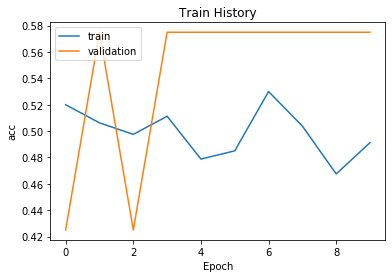

In [91]:
show_train_history(train_history,'acc','val_acc')

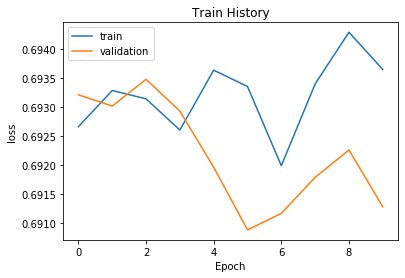

In [92]:
show_train_history(train_history,'loss','val_loss')

In [93]:
scores = modelLSTM.evaluate(X_test, Y_test,verbose=1)
print(scores)
print(scores[1])

90/90 [==============================] - 5s 52ms/step
[0.6955402135848999, 0.41111111177338494]
0.41111111177338494
